In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

TARGET = 'ICU Beds_x'
TARGET = 'diabetes_number'
TARGET = 'Heart disease_prevalence'

remove_relative = 'Heart'
%matplotlib inline

In [148]:
def to_categorical(df,columns=None):
    if columns is None:
        for i in ['object','str']:
            df.loc[:, df.dtypes == i] = df.loc[:, df.dtypes == i].apply(lambda x: x.astype('category'))
    else:
        df[columns] = df[columns].astype('category')
    return df

def clean_correlation(df,threshold=0.8):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

    return df,to_drop

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')

In [150]:
to_drop = [column for column in df.columns if remove_relative in column and column !=TARGET]
df.drop(columns=to_drop,inplace=True)

In [151]:
df[TARGET].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: Heart disease_prevalence
Non-Null Count  Dtype  
--------------  -----  
3140 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


In [152]:
df = to_categorical(df)


In [153]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [155]:
X_train.head(2)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
620,17055,38701,4642,11.994522,4734,12.232242,4325,11.175422,4360,11.265859,...,3261,13.0,12.0,14.1,3921,3.6,3.4,3.9,1097,6
1894,37013,47079,4851,10.303957,5620,11.937382,4853,10.308205,4680,9.940738,...,3949,15.9,14.9,17.0,5985,4.1,3.9,4.4,1554,5


In [156]:
X_train.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 620 to 860
Data columns (total 104 columns):
 #    Column                                                                         Dtype   
---   ------                                                                         -----   
 0    fips                                                                           int64   
 1    TOT_POP                                                                        int64   
 2    0-9                                                                            int64   
 3    0-9 y/o % of total pop                                                         float64 
 4    19-Oct                                                                         int64   
 5    10-19 y/o % of total pop                                                       float64 
 6    20-29                                                                          int64   
 7    20-29 y/o % of total pop               

In [157]:
print(X_train.shape,X_test.shape)
X_train,to_drop = clean_correlation(X_train)
X_test.drop(columns=to_drop,inplace=True)
print(X_train.shape,X_test.shape)


(2103, 104) (1037, 104)
(2103, 36) (1037, 36)


/tmp/ipykernel_2302/954546135.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [158]:
X_train.head(3)

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,80+ y/o % of total pop,...,PCTPOVALL_2018,MEDHHINC_2018,Unemployment_rate_2018,Active Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),COUNTY_NAME,STATE_NAME,CNTY_FIPS,anycondition_prevalence,Urban_rural_code
620,17055,38701,11.994522,12.232242,11.175422,11.265859,12.234826,13.707656,13.051342,5.005039,...,19.4,42071,6.1,284.4,7.0,Franklin,Illinois,55,52.6,6
1894,37013,47079,10.303957,11.937382,10.308205,9.940738,11.784447,13.887296,15.605684,5.076573,...,18.1,46411,4.6,255.0,7.1,Beaufort,North Carolina,13,53.6,5
553,16009,9226,12.215478,12.204639,9.473228,9.798396,10.481249,14.350748,16.572729,4.151312,...,14.7,48451,4.6,192.6,5.8,Benewah,Idaho,9,46.4,6


In [159]:
X_train.corr().style.background_gradient(cmap='Blues')

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,80+ y/o % of total pop,% White-alone,Native American/American Indian-alone pop,% NA/AI-alone,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,% Two or more races,N_POP_CHG_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,MEDHHINC_2018,Unemployment_rate_2018,Active Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),CNTY_FIPS,anycondition_prevalence,Urban_rural_code
fips,1.000000,-0.053685,-0.006450,0.017730,-0.030262,-0.042513,-0.052507,-0.003716,0.038472,0.028303,0.120768,-0.062971,0.009922,-0.056869,-0.053205,-0.047447,-0.054190,-0.010903,-0.024449,-0.003360,0.059906,0.056190,-0.004533,0.005137,-0.047288,0.025301,-0.078086,0.044156,-0.083580,0.071019,0.119215,0.176915,0.024669,0.004097
TOT_POP,-0.053685,1.000000,0.050697,0.019649,0.149580,0.279643,0.188814,-0.081638,-0.208520,-0.167024,-0.144662,0.776984,-0.043074,0.476936,0.456982,0.025829,0.120101,0.401296,-0.204601,0.182630,0.271622,-0.009472,-0.038947,-0.308107,-0.113276,0.321523,-0.093475,0.263959,-0.032645,0.156787,0.016420,-0.041909,-0.260757,-0.411040
0-9 y/o % of total pop,-0.006450,0.050697,1.000000,0.692436,0.126951,0.347046,-0.029745,-0.521875,-0.629750,-0.420681,-0.195286,0.128863,0.375761,0.065418,0.034481,-0.083885,0.106358,0.081977,-0.240820,0.717141,0.086136,-0.180396,0.197324,-0.136069,0.095701,-0.081307,0.069212,0.073528,-0.014571,-0.253531,-0.139684,0.078650,0.026557,-0.058296
10-19 y/o % of total pop,0.017730,0.019649,0.692436,1.000000,0.315857,0.143431,0.013568,-0.525517,-0.665487,-0.473892,-0.087790,0.080390,0.227085,0.039282,-0.009905,-0.138210,-0.025638,0.077066,-0.336817,0.556443,0.017838,-0.067229,0.111961,-0.191387,0.048209,0.043324,0.024902,0.141788,-0.075749,-0.242283,-0.229780,0.094655,-0.085089,-0.114702
20-29 y/o % of total pop,-0.030262,0.149580,0.126951,0.315857,1.000000,0.447988,0.013877,-0.609907,-0.670586,-0.531378,-0.286747,0.119180,0.026048,0.249919,0.071253,-0.054930,0.105314,0.086630,-0.350668,0.377447,0.289743,-0.095112,0.098141,-0.277455,-0.214590,0.264026,0.264360,0.002535,0.016546,0.014122,-0.017410,0.127196,-0.204879,-0.236786
30-39 y/o % of total pop,-0.042513,0.279643,0.347046,0.143431,0.447988,1.000000,0.484219,-0.379705,-0.677829,-0.606600,-0.250992,0.210773,0.013279,0.376818,0.143550,0.057679,0.197291,0.231544,-0.462911,0.522511,0.320083,-0.029115,0.063060,-0.336514,-0.113481,0.275540,-0.039512,0.331483,-0.078560,0.046487,0.002466,0.076714,-0.273132,-0.409273
40-49 y/o % of total pop,-0.052507,0.188814,-0.029745,0.013568,0.013877,0.484219,1.000000,0.203384,-0.354558,-0.515273,-0.052356,0.077550,-0.162365,0.213016,0.071142,-0.009213,-0.007734,0.186952,-0.181609,0.054804,0.059576,0.131740,0.152845,-0.030608,-0.306644,0.092964,-0.088393,0.318829,0.014220,0.054447,-0.013077,-0.007845,-0.030168,-0.399400
50-59 y/o % of total pop,-0.003716,-0.081638,-0.521875,-0.525517,-0.609907,-0.379705,0.203384,1.000000,0.585761,0.278842,0.155776,-0.134643,-0.144154,-0.127978,-0.065227,0.060730,-0.090178,-0.117571,0.295269,-0.516368,-0.236008,0.100469,-0.150650,0.309859,-0.039420,-0.112046,-0.241044,0.100882,0.013460,0.248197,0.195497,-0.117350,0.119511,-0.013530
60-69 y/o % of total pop,0.038472,-0.208520,-0.629750,-0.665487,-0.670586,-0.677829,-0.354558,0.585761,1.000000,0.663913,0.271895,-0.178352,-0.129566,-0.283702,-0.095997,0.081679,-0.087066,-0.183077,0.424162,-0.638825,-0.252474,0.125246,-0.227330,0.260418,0.198457,-0.156651,-0.115909,-0.207961,0.089115,0.112332,0.158888,-0.154317,0.13

array([[<AxesSubplot:xlabel='fips', ylabel='fips'>,
        <AxesSubplot:xlabel='TOT_POP', ylabel='fips'>,
        <AxesSubplot:xlabel='0-9 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='10-19 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='20-29 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='30-39 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='40-49 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='50-59 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='60-69 y/o % of total pop', ylabel='fips'>,
        <AxesSubplot:xlabel='80+ y/o % of total pop', ylabel='fips'>],
       [<AxesSubplot:xlabel='fips', ylabel='TOT_POP'>,
        <AxesSubplot:xlabel='TOT_POP', ylabel='TOT_POP'>,
        <AxesSubplot:xlabel='0-9 y/o % of total pop', ylabel='TOT_POP'>,
        <AxesSubplot:xlabel='10-19 y/o % of total pop', ylabel='TOT_POP'>,
        <AxesSubplot:xlabel='20-29 y/o % of total pop', yla

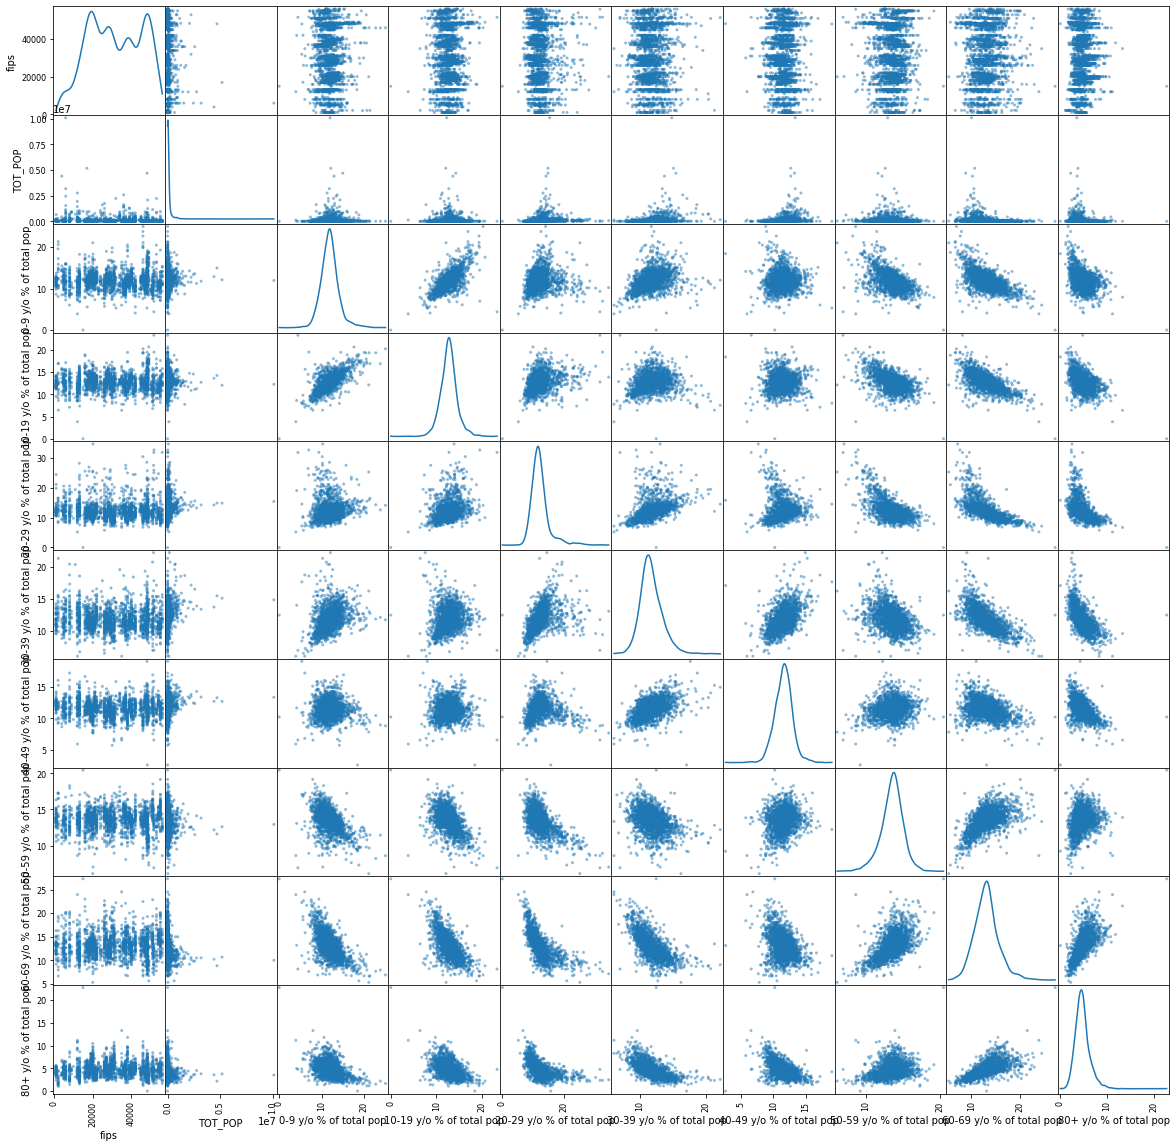

In [160]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train[X_train.columns[:10]], alpha=0.5, figsize=(20,20), diagonal='kde')

In [161]:
X_train.shape

(2103, 36)

array([[<AxesSubplot:xlabel='Active General Surgeons per 100000 Population 2018 (AAMC)', ylabel='Active General Surgeons per 100000 Population 2018 (AAMC)'>,
        <AxesSubplot:xlabel='CNTY_FIPS', ylabel='Active General Surgeons per 100000 Population 2018 (AAMC)'>,
        <AxesSubplot:xlabel='anycondition_prevalence', ylabel='Active General Surgeons per 100000 Population 2018 (AAMC)'>,
        <AxesSubplot:xlabel='Urban_rural_code', ylabel='Active General Surgeons per 100000 Population 2018 (AAMC)'>],
       [<AxesSubplot:xlabel='Active General Surgeons per 100000 Population 2018 (AAMC)', ylabel='CNTY_FIPS'>,
        <AxesSubplot:xlabel='CNTY_FIPS', ylabel='CNTY_FIPS'>,
        <AxesSubplot:xlabel='anycondition_prevalence', ylabel='CNTY_FIPS'>,
        <AxesSubplot:xlabel='Urban_rural_code', ylabel='CNTY_FIPS'>],
       [<AxesSubplot:xlabel='Active General Surgeons per 100000 Population 2018 (AAMC)', ylabel='anycondition_prevalence'>,
        <AxesSubplot:xlabel='CNTY_FIPS', ylabel=

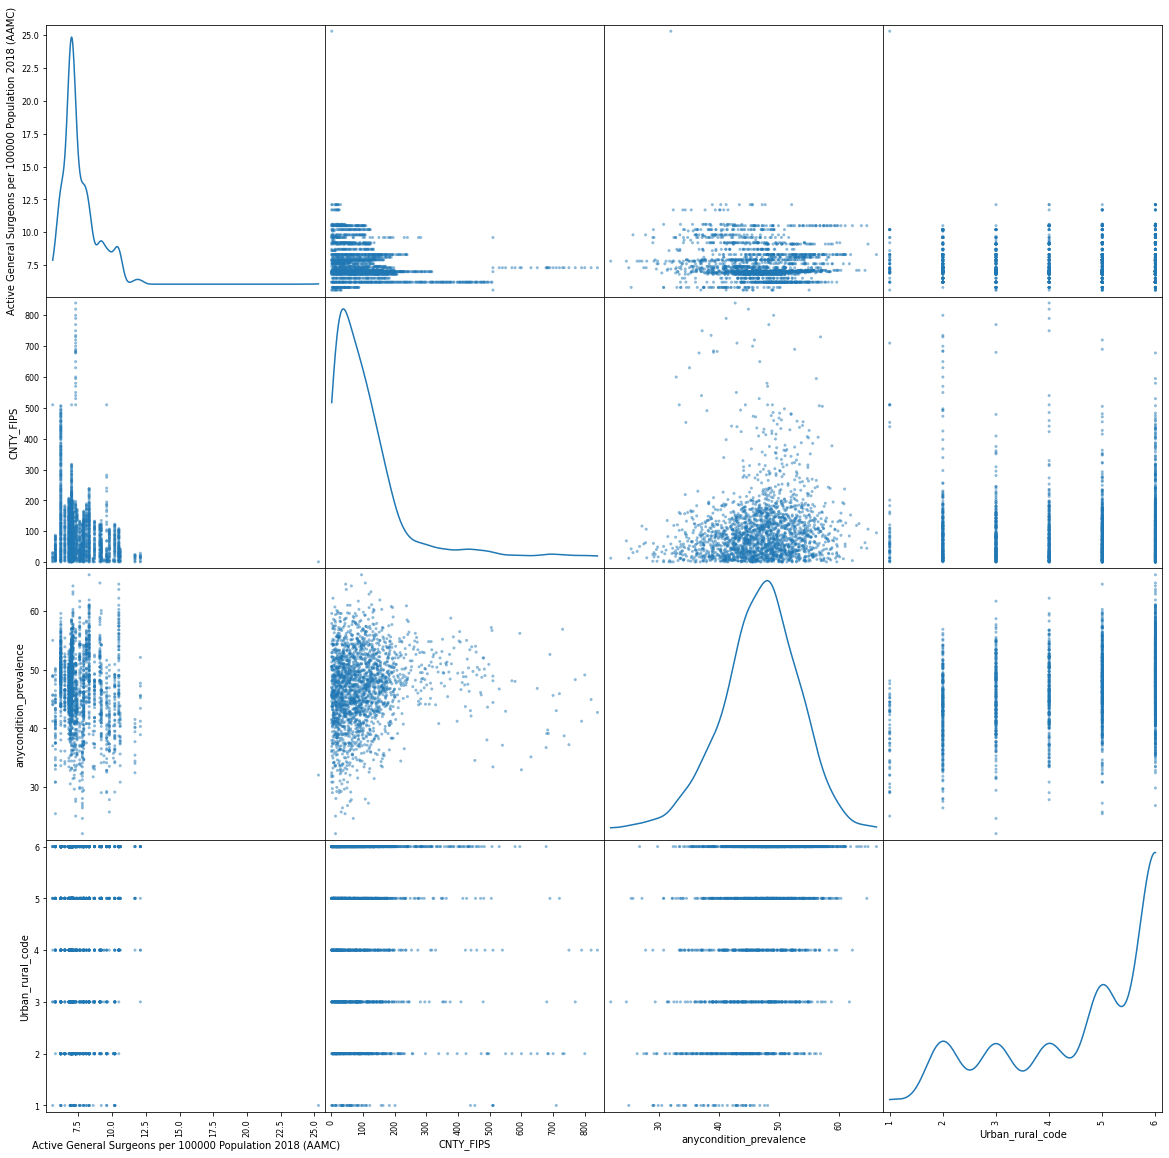

In [162]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train[X_train.columns[30:]], alpha=0.5, figsize=(20,20), diagonal='kde')

In [163]:
le = preprocessing.LabelEncoder()
for column in X_train.select_dtypes('category').columns:

    trained_le = le.fit(df[column])
    X_train[column] = trained_le.transform(X_train[column])
    X_test[column]  = trained_le.transform(X_test[column])

# Lasso

In [200]:
clf2 = linear_model.Lasso(alpha=0.9)

pipe = make_pipeline(StandardScaler(),clf2)
scores = cross_validate(pipe,X_train,y_train,return_train_score=True)


In [201]:
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.006100,0.024493,0.393086,0.382390
1,0.032243,0.007032,0.370848,0.373375
2,0.087981,0.008234,0.356801,0.374635
3,0.086501,0.007543,0.371285,0.385653
4,0.096292,0.016579,0.377532,0.365278


In [202]:
clf2.fit(X_train,y_train)
print('coef_      :',clf2.coef_)
print('intercept_ :',clf2.intercept_)

coef_      : [ 2.37492193e-06 -2.84281310e-07 -0.00000000e+00 -0.00000000e+00
 -1.01595448e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.26936900e-03  7.59125734e-06
  0.00000000e+00  0.00000000e+00  1.00533139e-05 -0.00000000e+00
  0.00000000e+00 -7.30559014e-06  0.00000000e+00 -4.16167250e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.01461179e-03 -0.00000000e+00  0.00000000e+00 -6.11835659e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.64699858e-05
  0.00000000e+00 -4.81196303e-04  7.72258674e-02  0.00000000e+00]
intercept_ : 9.369140386973369


In [203]:
y_train_pred = clf2.predict(X_train)

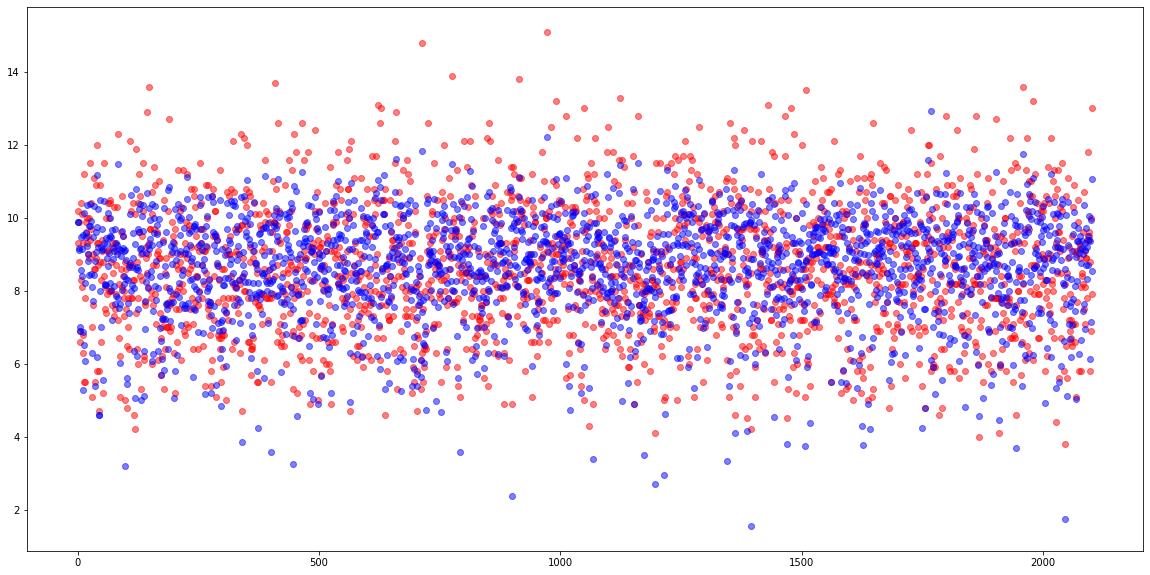

In [204]:
fig =plt.figure(figsize=(20,10))
plt.plot(range(len(y_train)),y_train,'ro',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'bo',alpha=0.5)


In [206]:
y_test_pred = clf2.predict(X_test)

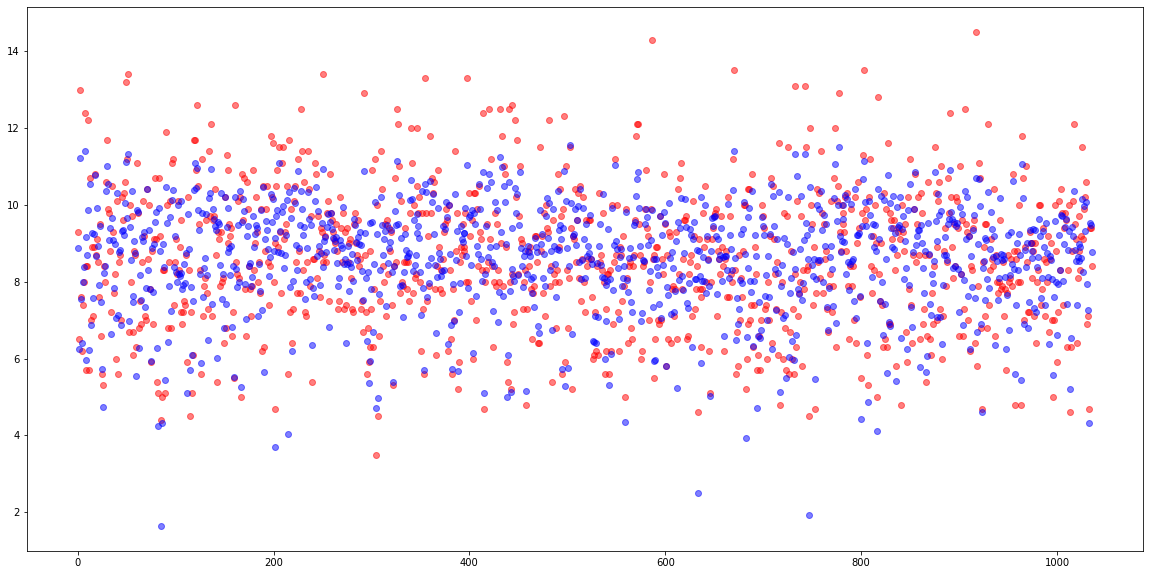

In [207]:
fig =plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)),y_test,'ro',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'bo',alpha=0.5)


In [209]:

rms_train = mean_squared_error(y_train, y_train_pred, squared=False)
rms_test  = mean_squared_error(y_test , y_test_pred, squared=False)

print('RMSE Train :',rms_train)
print('RMSE Test  :',rms_test)

RMSE Train : 0.7801176562314616
RMSE Test  : 0.7984517515772833
